In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns

pd.set_option('max_columns', None)

In [4]:
read_path = Path("../Output/")
mo = pd.read_csv(read_path / 'Monash/Monash.csv')
nl = pd.read_csv(read_path / 'Nighlights/nightlights.csv')

mo = mo[np.logical_and(mo['year'] >= 1992, mo['year'] <= 2013)].copy()
mo['adm2'].fillna(mo['adm1'], inplace=True)
mo['one'] = 1
mo = mo.groupby(['adm2', 'year'])[['sum_light', 'one']].sum().reset_index()

print(mo.shape)
mo = mo[mo['one'] == 1].copy()
print(mo.shape)

mo.head()

(114466, 4)
(110660, 4)


,adm2,year,sum_light,one
0,AGO.1.1_1,1992,0.0,1
1,AGO.1.1_1,1993,0.0,1
2,AGO.1.1_1,1994,0.0,1
3,AGO.1.1_1,1995,0.0,1
4,AGO.1.1_1,1996,0.0,1


In [5]:
nl.head()

,adm0,adm1,adm2,intersection_area,value,year
0,ALB,ALB.10_1,ALB.10.1_1,1.147588e+09,70.0,1992
1,ALB,ALB.10_1,ALB.10.2_1,1.056770e+09,0.0,1992
2,ALB,ALB.10_1,ALB.10.3_1,1.301028e+09,594.0,1992
3,ALB,ALB.11_1,ALB.11.1_1,4.093430e+08,290.0,1992
4,ALB,ALB.11_1,ALB.11.2_1,1.227538e+09,3004.0,1992


In [8]:
union = nl[['adm2', 'year', 'value']].merge(mo, on=['adm2', 'year'], validate='1:1')
union['lvalue'] = np.log(union['value'])
union['lsum_light'] = np.log(union['sum_light'])
union.head()

,adm2,year,value,sum_light,one,lvalue,lsum_light
0,BDI.10.1_1,1992,0.0,0.0,1,-inf,-inf
1,BDI.10.2_1,1992,0.0,0.0,1,-inf,-inf
2,BDI.10.3_1,1992,0.0,0.0,1,-inf,-inf
3,BDI.10.4_1,1992,0.0,0.0,1,-inf,-inf
4,BDI.10.5_1,1992,0.0,0.0,1,-inf,-inf


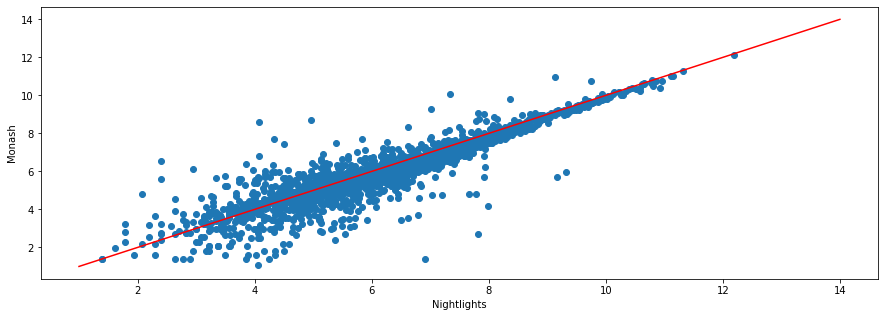

In [14]:
mask = union['year'] == 1994
plt.figure(figsize=(15, 5))
plt.scatter(union.loc[mask, 'lvalue'], union.loc[mask, 'lsum_light'])
plt.plot([1, 14], [1, 14], color='red')
plt.xlabel('Nightlights')
plt.ylabel('Monash')
plt.show()

<Figure size 1080x360 with 0 Axes>

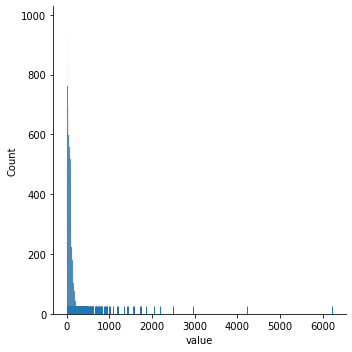

In [12]:
plt.figure(figsize=(15, 5))

mask = np.logical_and(union['sum_light'] < 100, union['value'] > 0)
sns.displot(union.loc[mask, 'value'], rug=True)
plt.show()

In [66]:
union[np.logical_and(union['value']>6000, union['sum_light'] == 0)]

,adm2,year,value,sum_light,one
12585,GIN.8.1_1,1994,6219.0,0.0,1


In [67]:
union[union['adm2'] == 'GIN.8.1_1']

,adm2,year,value,sum_light,one
2251,GIN.8.1_1,1992,74.0,0.0,1
7418,GIN.8.1_1,1993,0.0,0.0,1
12585,GIN.8.1_1,1994,6219.0,0.0,1
17752,GIN.8.1_1,1995,16.0,0.0,1
22919,GIN.8.1_1,1996,0.0,0.0,1
28086,GIN.8.1_1,1997,141.0,0.0,1
31753,GIN.8.1_1,1998,0.0,0.0,1
36920,GIN.8.1_1,1999,4.0,0.0,1
43587,GIN.8.1_1,2000,5.0,0.0,1
48754,GIN.8.1_1,2001,28.0,0.0,1


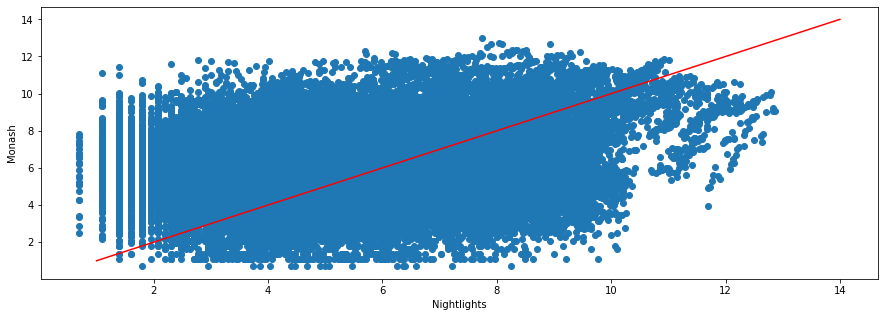

In [56]:
nl = pd.read_csv(read_path / 'Nighlights/old/nightlights.csv')

union_old = nl[['adm2', 'year', 'value']].merge(mo, on=['adm2', 'year'], validate='1:1')

mask = union_old['sum_light'] > -1

plt.figure(figsize=(15, 5))
plt.scatter(np.log(union_old.loc[mask, 'value']), np.log(union_old.loc[mask, 'sum_light']))
plt.plot([1, 14], [1, 14], color='red')
plt.xlabel('Nightlights')
plt.ylabel('Monash')
plt.show()